# 0.0 - Imports Libraries

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.ensemble import RandomForestRegressor

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Dataset

In [3]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

# 2.0 - Algoritmo: Random Forest Regressor

Parameters:
* n_estimators
* max_depth

## 2.1 - Performance for Train Dataset

In [4]:
# definition
model_train = RandomForestRegressor( random_state=77)

# training
model_train.fit( df_X_train, df_y_train )

# performance
y_pred_train = model_train.predict( df_X_train )

# performance metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )

print( f'Train R2: {r2_train:.5}' )
print( f'Train MSE: {mse_train:.5}' )
print( f'Train RMSE: {rmse_train:.5}' )
print( f'Train MAE: {mae_train:.5}' )
print( f'Train MAPE: {mape_train:.5}' )

Train R2: 0.90235
Train MSE: 46.676
Train RMSE: 6.832
Train MAE: 4.8787
Train MAPE: 2.6254


## 2.2 - Performance for Validation Dataset



In [5]:
# definition
model_val = RandomForestRegressor( random_state=77)

# training
model_val.fit( df_X_train, df_y_train )

# performance
y_pred_val = model_val.predict( df_X_val )

# performance metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )

print( f'Validation R2: {r2_val:.5}' )
print( f'Validation MSE: {mse_val:.5}' )
print( f'Validation RMSE: {rmse_val:.5}' )
print( f'Validation MAE: {mae_val:.5}' )
print( f'Validation MAPE: {mape_val:.5}' )

Validation R2: 0.32984
Validation MSE: 320.01
Validation RMSE: 17.889
Validation MAE: 13.039
Validation MAPE: 7.0583


## 2.3 - Hyperparamter Fine Tuning

N Estimators

In [6]:
n_estimators = np.arange( 1, 250, 10 )

r2_list_n = []
mse_list_n = []
rmse_list_n = []
mae_list_n = []
mape_list_n = []

In [7]:
for n in n_estimators:
    # definition
    model_n = RandomForestRegressor( random_state=77, n_estimators=n )
    # training
    model_n.fit( df_X_train, df_y_train )
    # performance
    y_pred_n = model_n.predict( df_X_val )
    # performance metrics
    r2_n = mt.r2_score( df_y_val, y_pred_n )
    mse_n = mt.mean_squared_error( df_y_val, y_pred_n )
    rmse_n = mt.mean_squared_error( df_y_val, y_pred_n, squared=False )
    mae_n = mt.mean_absolute_error( df_y_val, y_pred_n )
    mape_n = mt.mean_absolute_percentage_error( df_y_val, y_pred_n )

    r2_list_n.append( r2_n )
    mse_list_n.append( mse_n )
    rmse_list_n.append( rmse_n )
    mae_list_n.append( mae_n )
    mape_list_n.append( mape_n )

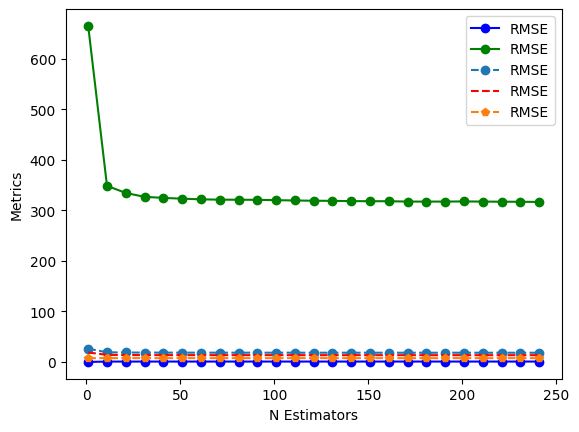

In [8]:
plt.plot( n_estimators, r2_list_n, 'bo-', label='RMSE')
plt.plot( n_estimators, mse_list_n, 'go-', label='RMSE')
plt.plot( n_estimators, rmse_list_n, 'o--', label='RMSE')
plt.plot( n_estimators, mae_list_n, 'r--', label='RMSE')
plt.plot( n_estimators, mape_list_n, 'p--', label='RMSE')
plt.xlabel( 'N Estimators' )
plt.ylabel( 'Metrics' )
plt.legend();

In [9]:
best_estimator = n_estimators[ np.argmin( rmse_list_n) ]
best_estimator

241

Max Depth

In [10]:
max_depth = np.arange( 1, 30, 1)

r2_list_m = []
mse_list_m = []
rmse_list_m = []
mae_list_m = []
mape_list_m = []

In [11]:
for m in max_depth:
    # definition
    model_m = RandomForestRegressor( random_state=77, n_estimators=best_estimator, max_depth=m  )
    # training
    model_m.fit( df_X_train, df_y_train )
    # performance
    y_pred_m = model_m.predict( df_X_val )
    # performance metrics
    r2_m = mt.r2_score( df_y_val, y_pred_m )
    mse_m = mt.mean_squared_error( df_y_val, y_pred_m )
    rmse_m = mt.mean_squared_error( df_y_val, y_pred_m, squared=False )
    mae_m = mt.mean_absolute_error( df_y_val, y_pred_m )
    mape_m = mt.mean_absolute_percentage_error( df_y_val, y_pred_m )

    r2_list_m.append( r2_m )
    mse_list_m.append( mse_m )
    rmse_list_m.append( rmse_m )
    mae_list_m.append( mae_m )
    mape_list_m.append( mape_m )

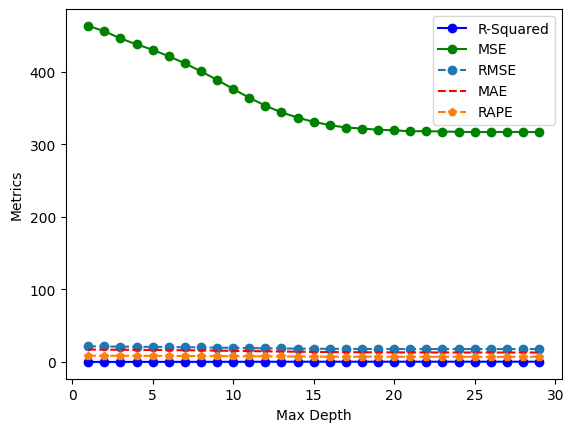

In [12]:
plt.plot( max_depth, r2_list_m, 'bo-', label='R-Squared')
plt.plot( max_depth, mse_list_m, 'go-', label='MSE')
plt.plot( max_depth, rmse_list_m, 'o--', label='RMSE')
plt.plot( max_depth, mae_list_m, 'r--', label='MAE')
plt.plot( max_depth, mape_list_m, 'p--', label='RAPE')
plt.xlabel( 'Max Depth' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_depth = max_depth[np.argmin( rmse_list_m) ]
best_depth

29

## 2.4 - Performance for Test Dataset

In [15]:
# definition
model_test = RandomForestRegressor( random_state=77, n_estimators=best_estimator, max_depth=best_depth )

# training
model_test.fit( np.concatenate(( df_X_train, df_X_val)), np.concatenate(( df_y_train, df_y_val)) )

# performance
y_pred_test = model_test.predict( df_X_test )

# performance metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )


print( f'Test R2: {r2_test:.7}' )
print( f'Test MSE: {mse_test:.7}' )
print( f'Test RMSE: {rmse_test:.7}' )
print( f'Test MAE: {mae_test:.7}' )
print( f'Test MAPE: {mape_test:.7}' )

Test R2: 0.4080753
Test MSE: 288.2087
Test RMSE: 16.97671
Test MAE: 12.1649
Test MAPE: 6.249655
